## 1. Aim: To find the shortest possible path between all the airports
### There are two ways in which we can define a path as the shortest:
 * By distance
 * By air time

`URL:` https://www.analyticsvidhya.com/blog/2018/09/introduction-graph-theory-applications-python/?utm_source=blog&utm_medium=community-detection-graphs-networks

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./data/airline_data.csv')

In [3]:
data.head().T

0     1     2     3     4
Year        2008  2008  2008  2008  2008
Month          1     1     1     1     1
DayofMonth     3     3     3     3     3
DayOfWeek      4     4     4     4     4
DepTime     2003   754   628   926  1829
CRSDepTime  1955   735   620   930  1755
ArrTime     2211  1002   804  1054  1959
CRSArrTime  2225  1000   750  1100  1925
AirTime      116   113    76    78    77
Origin       IAD   IAD   IND   IND   IND
Dest         TPA   TPA   BWI   BWI   BWI
Distance     810   810   515   515   515

**CRSDepTime**: Scheduled time of departure 

**CRSArrTime**: Scheduled time of arrival 

**DepTime**: Actual time of departure 

**ArrTime**: Actual time of arrival

**Origin**: Origin

**Dest**: Destination of the journey


**We can convert the problem to a graph by representing all the airports as vertices, and the route between them as edges. We will be using NetworkX for creating and visualizing graphs.**

In [4]:
G = nx.from_pandas_edgelist(data, source='Origin', target='Dest', edge_attr=True)

In [5]:
G.nodes()

NodeView(('IAD', 'TPA', 'IND', 'BWI', 'JAX', 'LAS', 'MCI', 'MCO', 'MDW', 'PHX', 'ISP', 'FLL', 'PBI', 'RSW', 'JAN', 'HOU', 'BHM', 'BNA', 'ORF', 'PHL', 'ABQ', 'ALB', 'AMA', 'AUS', 'BDL', 'BOI', 'BUF', 'BUR', 'CLE', 'CMH', 'DEN', 'ELP', 'GEG', 'LAX', 'LBB', 'LIT', 'MAF', 'MHT', 'MSY', 'OAK', 'OKC', 'OMA', 'ONT', 'PDX', 'PIT', 'PVD', 'RDU', 'RNO', 'SAN', 'SAT', 'SDF', 'SEA', 'SFO', 'SJC', 'SLC', 'SMF', 'SNA', 'STL', 'TUL', 'TUS', 'DAL', 'DTW', 'HRL', 'CRP'))

In [6]:
G.edges()

EdgeView([('IAD', 'TPA'), ('IAD', 'LAS'), ('IAD', 'MCO'), ('IAD', 'MDW'), ('TPA', 'IND'), ('TPA', 'ISP'), ('TPA', 'JAX'), ('TPA', 'LAS'), ('TPA', 'MCI'), ('TPA', 'MDW'), ('TPA', 'MHT'), ('TPA', 'MSY'), ('TPA', 'ORF'), ('TPA', 'PBI'), ('TPA', 'PHL'), ('TPA', 'PHX'), ('TPA', 'PIT'), ('TPA', 'PVD'), ('TPA', 'RDU'), ('TPA', 'SAT'), ('TPA', 'SDF'), ('TPA', 'STL'), ('TPA', 'ABQ'), ('TPA', 'ALB'), ('TPA', 'AUS'), ('TPA', 'BDL'), ('TPA', 'BHM'), ('TPA', 'BNA'), ('TPA', 'BUF'), ('TPA', 'BWI'), ('TPA', 'CMH'), ('TPA', 'DEN'), ('TPA', 'FLL'), ('TPA', 'HOU'), ('IND', 'BWI'), ('IND', 'JAX'), ('IND', 'LAS'), ('IND', 'MCI'), ('IND', 'MCO'), ('IND', 'MDW'), ('IND', 'PHX'), ('BWI', 'ISP'), ('BWI', 'JAN'), ('BWI', 'JAX'), ('BWI', 'LAS'), ('BWI', 'LIT'), ('BWI', 'MCI'), ('BWI', 'MCO'), ('BWI', 'MDW'), ('BWI', 'MHT'), ('BWI', 'MSY'), ('BWI', 'OKC'), ('BWI', 'ORF'), ('BWI', 'PBI'), ('BWI', 'PHX'), ('BWI', 'PIT'), ('BWI', 'PVD'), ('BWI', 'RDU'), ('BWI', 'RSW'), ('BWI', 'SAN'), ('BWI', 'SAT'), ('BWI', 'SDF')

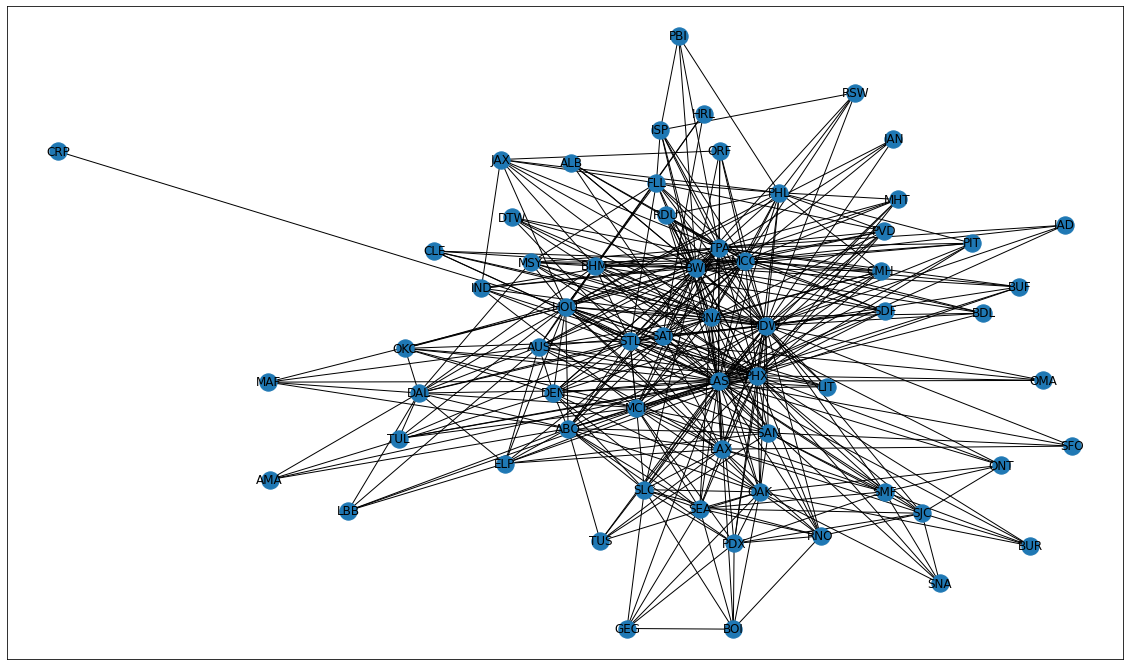

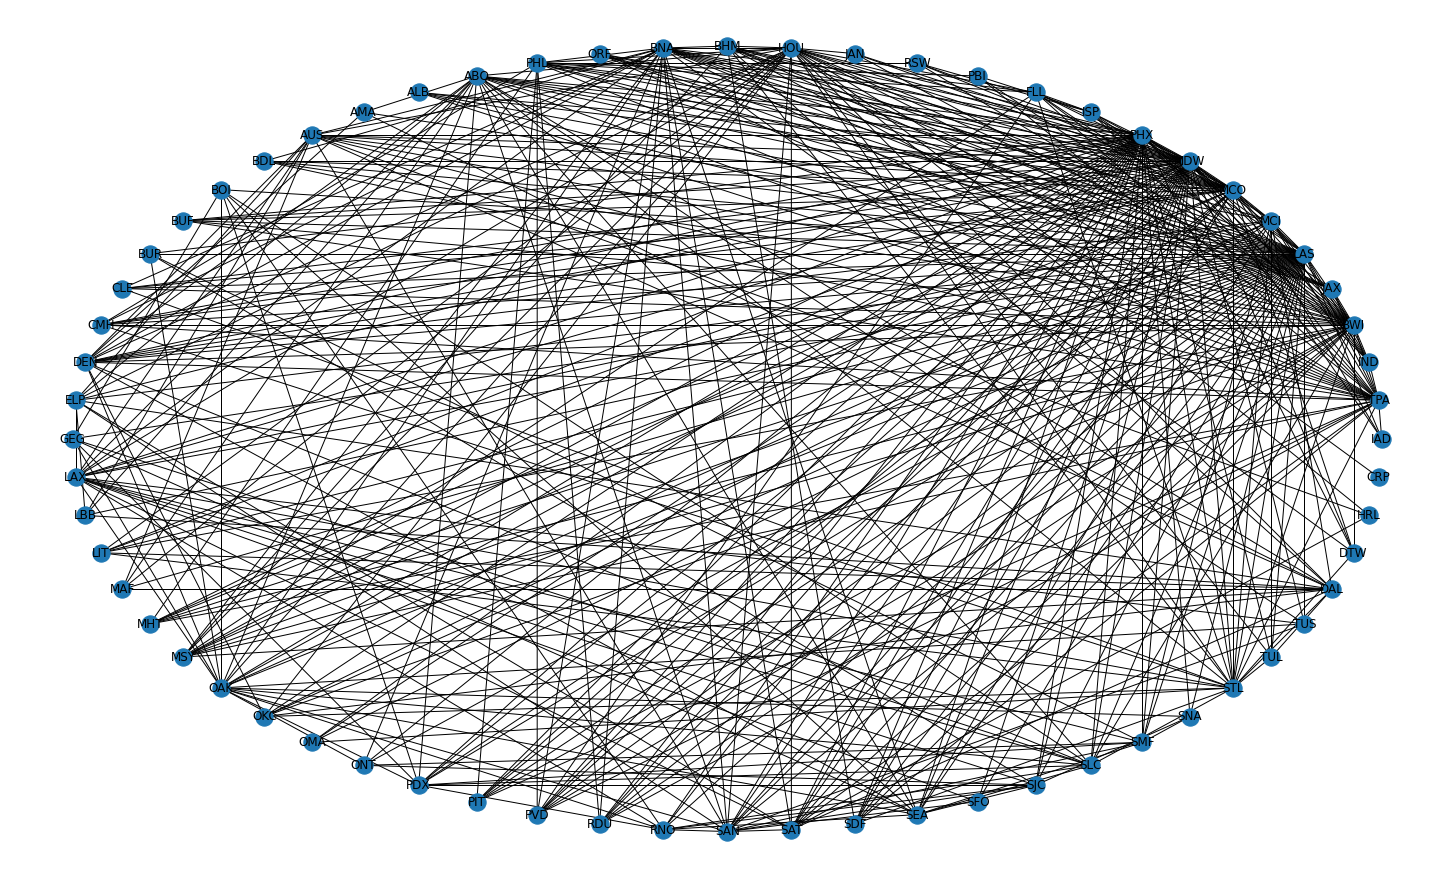

In [7]:
plt.figure(figsize=(20,12))
nx.draw_networkx(G, with_labels=True)
plt.show()
plt.figure(figsize=(20, 12))
nx.draw_circular(G, with_labels=True)
plt.show()

The above amazing visualization represents the different flight routes. Suppose a passenger wants to take the shortest route from **AMA** to **PBI**. Graph theory comes to the rescue once again!

Try to calculate the shortest path based on the airtime between the airports AMA and PBI. We will be using **Dijkstra’s shortest path algorithm**. This algorithm finds the shortest path from a source vertex to all the vertices of the given graph. 

In [8]:
shortest_path_distance = nx.dijkstra_path(G, source='AMA', target='PBI', weight='Distance')
shortest_path_distance

['AMA', 'DAL', 'MSY', 'TPA', 'PBI']

This is the shortest possible path between the two airports based on the distance between them. 

We can also calculate the shortest path based on the airtime just by changing the hyperparameter ***weight=’AirTime’***

In [9]:
shortest_path_distance = nx.dijkstra_path(G, source='AMA', target='PBI', weight='AirTime')
shortest_path_distance

['AMA', 'DAL', 'BHM', 'TPA', 'PBI']

In [10]:
G

In [11]:
print("Node Degree")
for v in G:
    print(f'{v}     {G.degree(v)}')

Node Degree
IAD     4
TPA     31
IND     8
BWI     38
JAX     9
LAS     54
MCI     20
MCO     33
MDW     47
PHX     42
ISP     8
FLL     12
PBI     4
RSW     5
JAN     4
HOU     29
BHM     13
BNA     27
ORF     6
PHL     16
ABQ     22
ALB     5
AMA     4
AUS     16
BDL     6
BOI     7
BUF     6
BUR     5
CLE     6
CMH     9
DEN     16
ELP     10
GEG     6
LAX     18
LBB     5
LIT     7
MAF     5
MHT     7
MSY     11
OAK     20
OKC     8
OMA     4
ONT     6
PDX     12
PIT     7
PVD     9
RDU     8
RNO     11
SAN     17
SAT     13
SDF     8
SEA     14
SFO     4
SJC     11
SLC     14
SMF     11
SNA     5
STL     22
TUL     6
TUS     6
DAL     15
DTW     6
HRL     3
CRP     1


---

## 2. Aim: How to Predict your Future Connections on Facebook i.e. (Build a link prediction model to predict future links (mutual likes) between unconnected nodes (Facebook pages).

`URL:` https://www.analyticsvidhya.com/blog/2020/01/link-prediction-how-to-predict-your-future-connections-on-facebook/?utm_source=blog&utm_medium=introduction-graph-theory-applications-python

In [12]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from node2vec import Node2Vec

In [13]:
# load nodes details
with open("./data/fb-pages-food/fb-pages-food.nodes", 'rb') as f:
    fb_nodes = f.read().splitlines()


# load edges (or links)
with open("./data/fb-pages-food/fb-pages-food.edges", 'r') as f:
    fb_links = f.read().splitlines() 

len(fb_nodes), len(fb_links)

(621, 2102)

In [14]:
# captture nodes in 2 separate lists
node_list_1 = []
node_list_2 = []

for i in tqdm(fb_links):
#     print(i.split(',')[0])
    node_list_1.append(i.split(',')[0])
    node_list_2.append(i.split(',')[1])

fb_df = pd.DataFrame({'node_1': node_list_1, 'node_2': node_list_2})

100%|████████████| 2102/2102 [00:00<00:00, 524225.65it/s]


In [15]:
fb_df

node_1 node_2
0         0    276
1         0     58
2         0    132
3         0    603
4         0    398
...     ...    ...
2097    597    611
2098    601    603
2099    601    616
2100    603    616
2101    311    613

[2102 rows x 2 columns]

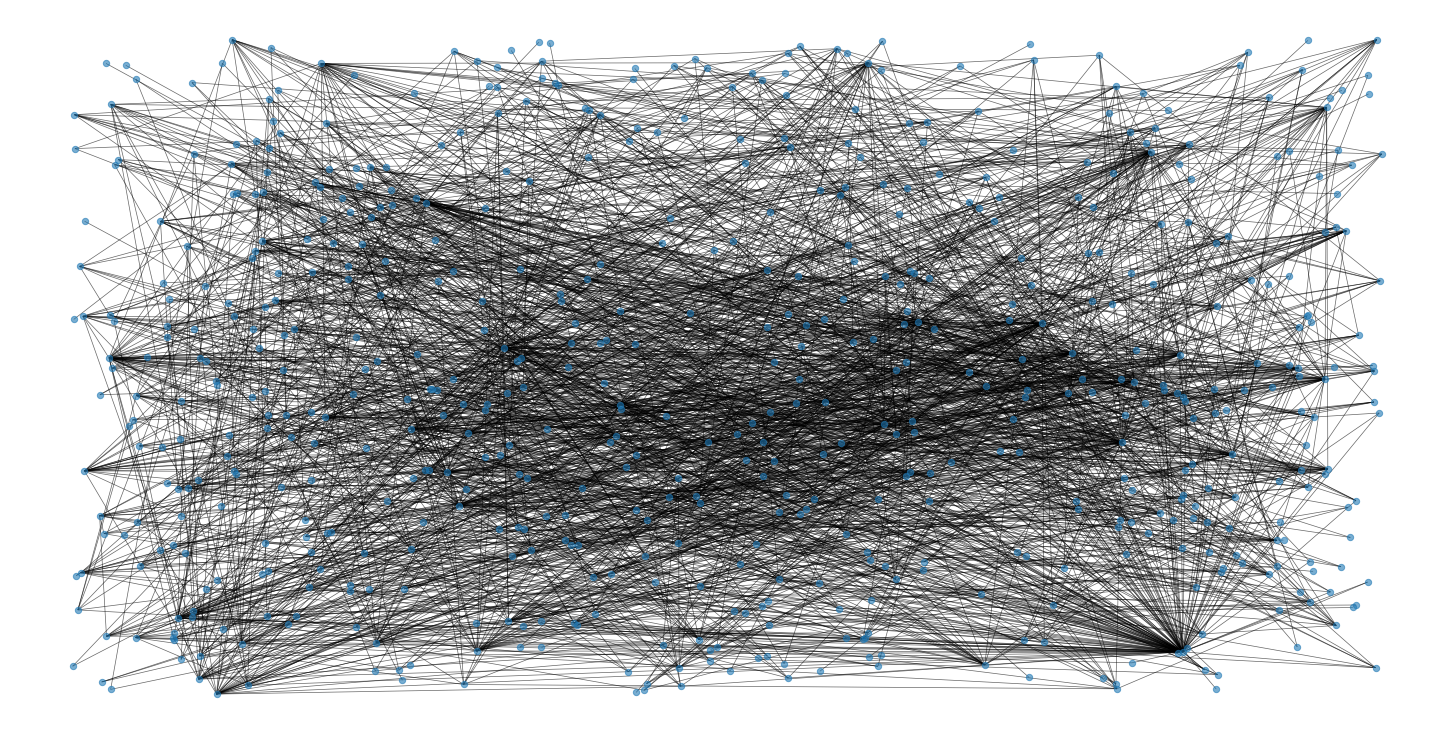

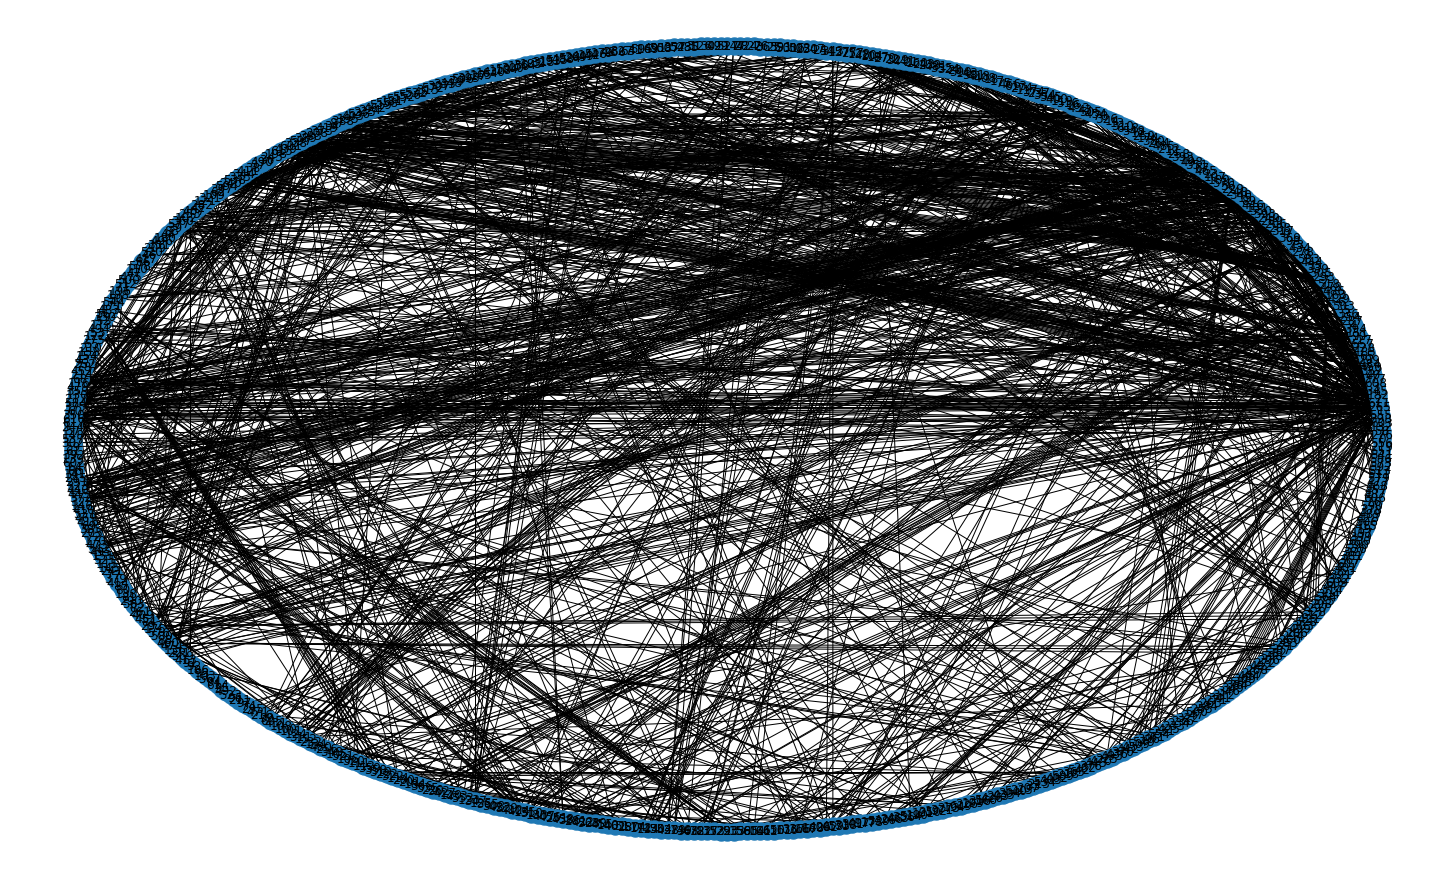

In [16]:
# create graph
G = nx.from_pandas_edgelist(fb_df, "node_1", "node_2", create_using=nx.Graph())

# plot graph
plt.figure(figsize=(20,10))

pos = nx.random_layout(G, seed=23)
nx.draw(G, with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)

plt.show()

plt.figure(figsize=(20, 12))
nx.draw_circular(G, with_labels=True)
plt.show()

In [17]:
# combine all nodes in a list
node_list = node_list_1 + node_list_2

# remove duplicate items from the list
node_list = list(dict.fromkeys(node_list))

# build adjacency matrix
adj_G = nx.to_numpy_matrix(G, nodelist = node_list)
adj_G

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
adj_G.shape

(620, 620)

In [19]:
# get unconnected node-pairs
all_unconnected_pairs = []

# traverse adjacency matrix
offset = 0
for i in tqdm(range(adj_G.shape[0])):
    for j in range(offset,adj_G.shape[1]):
        if i != j:
            if nx.shortest_path_length(G, str(i), str(j)) <=2:
                if adj_G[i,j] == 0:
                    all_unconnected_pairs.append([node_list[i],node_list[j]])

    offset = offset + 1

100%|██████████████████| 620/620 [00:07<00:00, 78.94it/s]


In [20]:
len(all_unconnected_pairs)

19018

In [21]:
node_1_unlinked = [i[0] for i in all_unconnected_pairs]
node_2_unlinked = [i[1] for i in all_unconnected_pairs]

data = pd.DataFrame({'node_1':node_1_unlinked, 
                     'node_2':node_2_unlinked})

# add target variable 'link'
data['link'] = 0

In [22]:
initial_node_count = len(G.nodes)

fb_df_temp = fb_df.copy()

# empty list to store removable links
omissible_links_index = []

for i in tqdm(fb_df.index.values):
  
    # remove a node pair and build a new graph
    G_temp = nx.from_pandas_edgelist(fb_df_temp.drop(index = i), "node_1", "node_2", create_using=nx.Graph())
  
      # check there is no spliting of graph and number of nodes is same
    if (nx.number_connected_components(G_temp) == 1) and (len(G_temp.nodes) == initial_node_count):
        omissible_links_index.append(i)
        fb_df_temp = fb_df_temp.drop(index = i)

100%|███████████████| 2102/2102 [00:07<00:00, 285.36it/s]


In [23]:
len(omissible_links_index)

1483

In [24]:
# create dataframe of removable edges
fb_df_ghost = fb_df.loc[omissible_links_index]

# add the target variable 'link'
fb_df_ghost['link'] = 1

data = data.append(fb_df_ghost[['node_1', 'node_2', 'link']], ignore_index=True)

In [25]:
data['link'].value_counts()

0    19018
1     1483
Name: link, dtype: int64

In [26]:
# drop removable edges
fb_df_partial = fb_df.drop(index=fb_df_ghost.index.values)

# build graph
G_data = nx.from_pandas_edgelist(fb_df_partial, "node_1", "node_2", create_using=nx.Graph())

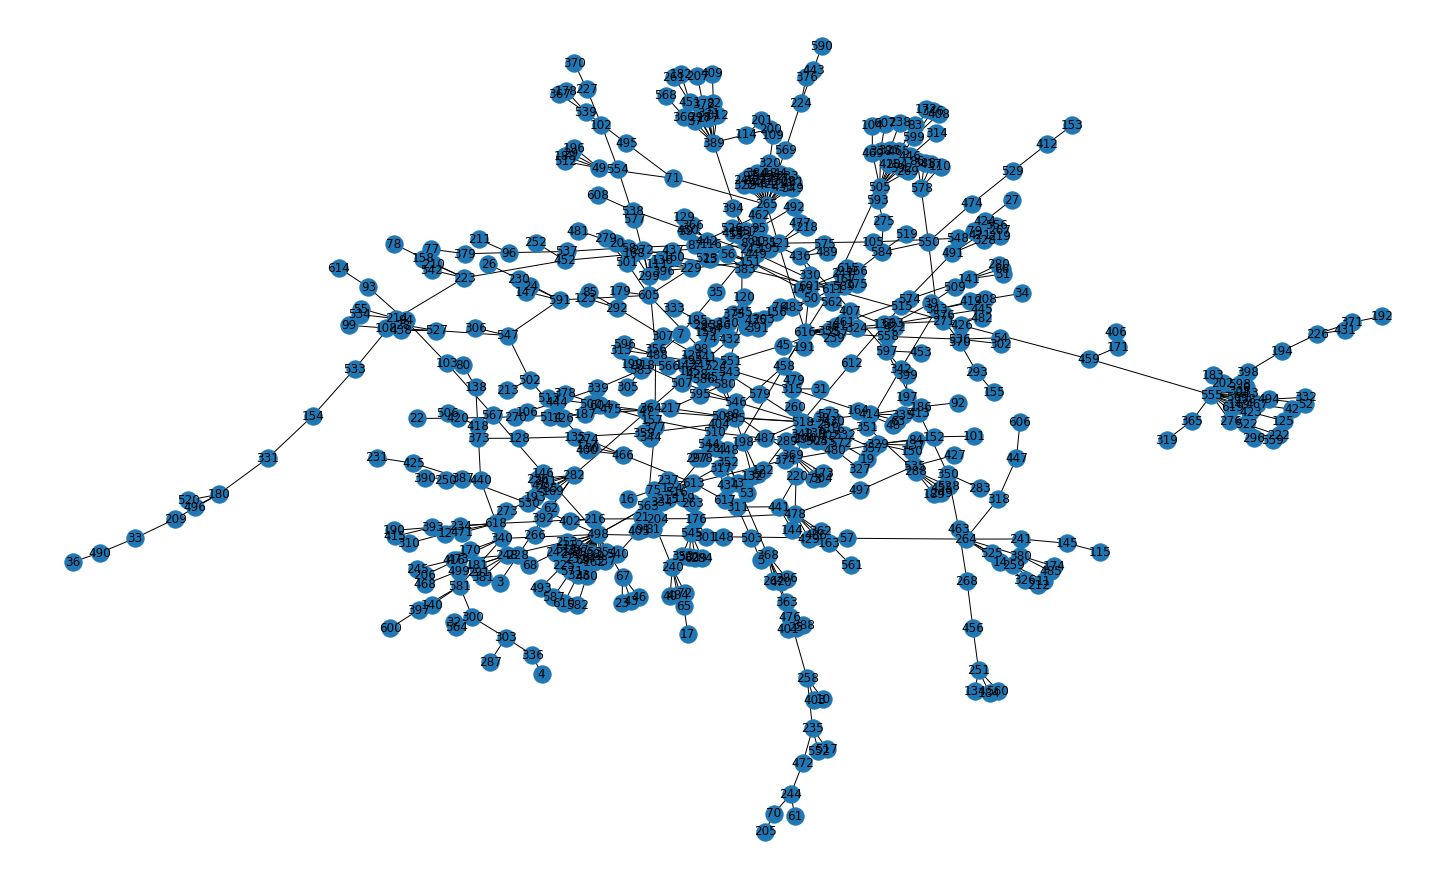

In [27]:
plt.figure(figsize=(20,12))
nx.draw(G_data, with_labels=True)
plt.show()

In [28]:
# Generate walks
node2vec = Node2Vec(G_data, dimensions=100, walk_length=16, num_walks=50)

# train node2vec model
n2w_model = node2vec.fit(window=7, min_count=1)

Generating walks (CPU: 1): 100%|█| 50/50 [00:16<00:00,  2.97it/s]


In [29]:
x = [(n2w_model[str(i)]+n2w_model[str(j)]) for i,j in zip(data['node_1'], data['node_2'])]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [30]:
x

[array([-0.09662685,  0.04884911,  1.4022232 ,  0.5756545 , -1.6861951 ,
        -0.34838432,  1.1246153 ,  0.8083609 ,  0.30511457, -1.0931932 ,
         1.196146  , -0.40919742, -0.22145784, -1.0353895 ,  0.63419247,
         0.11229928, -0.5024249 , -1.2431775 , -1.3040826 , -1.5122247 ,
         0.07643187, -1.061811  , -1.0025415 , -1.6857157 , -0.5647992 ,
        -0.36533198, -0.53957856, -0.08054484,  1.3606346 , -0.20253824,
        -1.7603403 , -0.4484756 , -0.8809394 , -0.30432934,  0.2807468 ,
        -0.8934139 ,  0.19410953,  0.9373096 ,  2.7926888 ,  0.5764211 ,
         0.88608027, -0.06869942,  0.27891493, -1.0294275 ,  1.2962416 ,
        -1.0951381 , -0.38192007,  0.6737379 , -0.57457525, -0.5229381 ,
        -0.72349274,  0.79816175, -0.15909456,  0.36186782,  0.04092792,
        -1.2643423 , -0.4923224 ,  0.76673865, -0.16199324,  0.13993928,
        -1.3775573 ,  0.3026271 , -0.6707952 , -0.66920024,  0.8173056 ,
         1.145305  , -0.1510319 ,  1.1117795 ,  0.4

In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(np.array(x), data['link'], 
                                                test_size = 0.3, 
                                                random_state = 35)

In [32]:
lr = LogisticRegression(class_weight="balanced")

lr.fit(xtrain, ytrain)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
predictions = lr.predict_proba(xtest)

In [34]:
roc_auc_score(ytest, predictions[:,1])

0.8103584501291283

In [35]:
import lightgbm as lgbm

In [36]:
train_data = lgbm.Dataset(xtrain, ytrain)
test_data = lgbm.Dataset(xtest, ytest)

# define parameters
parameters = {
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'num_threads' : 2,
    'seed' : 76
}

# train lightGBM model
model = lgbm.train(parameters,
                   train_data,
                   valid_sets=test_data,
                   num_boost_round=1000,
                   early_stopping_rounds=20)

[1]	valid_0's auc: 0.717917
Training until validation scores don't improve for 20 rounds
[2]	valid_0's auc: 0.753597
[3]	valid_0's auc: 0.777494
[4]	valid_0's auc: 0.791311
[5]	valid_0's auc: 0.802506
[6]	valid_0's auc: 0.808408
[7]	valid_0's auc: 0.815041
[8]	valid_0's auc: 0.821125
[9]	valid_0's auc: 0.82712
[10]	valid_0's auc: 0.831678
[11]	valid_0's auc: 0.834284
[12]	valid_0's auc: 0.834554
[13]	valid_0's auc: 0.83791
[14]	valid_0's auc: 0.841535
[15]	valid_0's auc: 0.843931
[16]	valid_0's auc: 0.847872
[17]	valid_0's auc: 0.848951
[18]	valid_0's auc: 0.851047
[19]	valid_0's auc: 0.852265
[20]	valid_0's auc: 0.854292
[21]	valid_0's auc: 0.858552
[22]	valid_0's auc: 0.861566
[23]	valid_0's auc: 0.865406
[24]	valid_0's auc: 0.868586
[25]	valid_0's auc: 0.870637
[26]	valid_0's auc: 0.872824
[27]	valid_0's auc: 0.873471
[28]	valid_0's auc: 0.875687
[29]	valid_0's auc: 0.876911
[30]	valid_0's auc: 0.87852
[31]	valid_0's auc: 0.879047
[32]	valid_0's auc: 0.879944
[33]	valid_0's auc: 0.8